In [45]:
import investpy
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
from statsmodels.tsa.stattools import coint
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sb

now_ = datetime.datetime.now()
now = now_.strftime("%d/%m/%Y")
print(now)

months_before_ = datetime.datetime.now() + relativedelta(months=-60)
months_before = months_before_.strftime("%d/%m/%Y")
print(months_before)

start_date = months_before
end_date = now
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 300

14/10/2020
14/10/2015


In [46]:
bank = pd.DataFrame({'akbnk' : investpy.get_stock_historical_data(stock='AKBNK', country='turkey', from_date=start_date, to_date=end_date)['Close'], 
                       'isctr' : investpy.get_stock_historical_data(stock='ISCTR', country='turkey', from_date=start_date, to_date=end_date)['Close'], 
                       'garan' : investpy.get_stock_historical_data(stock='GARAN', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                       'ykbnk' : investpy.get_stock_historical_data(stock='YKBNK', country='turkey', from_date=start_date, to_date=end_date)['Close']})

bank_prices = pd.DataFrame({'akbnk' : investpy.get_stock_historical_data(stock='AKBNK', country='turkey', from_date=start_date, to_date=end_date)['Close'], 
                       'isctr' : investpy.get_stock_historical_data(stock='ISCTR', country='turkey', from_date=start_date, to_date=end_date)['Close'], 
                       'garan' : investpy.get_stock_historical_data(stock='GARAN', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                       'ykbnk' : investpy.get_stock_historical_data(stock='YKBNK', country='turkey', from_date=start_date, to_date=end_date)['Close']})

In [47]:
bank = bank.round(2)
bank = bank.pct_change()
bank = bank.dropna()
bank = bank.reset_index(drop=0)
bank = bank.set_index('Date', append=True)

In [48]:
bank

,,akbnk,isctr,garan,ykbnk
,Date,,,,
0,2015-10-15,-0.001395,0.002151,-0.016529,-0.002732
1,2015-10-16,-0.011173,-0.010730,-0.008403,-0.019178
2,2015-10-19,0.008475,0.008677,0.016949,0.011173
3,2015-10-20,0.009804,0.010753,0.011111,0.013812
4,2015-10-21,-0.005548,-0.010638,-0.009615,-0.019074
...,...,...,...,...,...
1250,2020-10-07,-0.013619,-0.003802,-0.014065,0.000000
1251,2020-10-08,0.000000,0.000000,-0.005706,-0.009346
1252,2020-10-09,0.015779,0.015267,0.018651,0.014151


In [49]:
g = globals()
from itertools import chain, combinations
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels
import re

def comb_func(columns):
    minimum_combination = 1
    for i in range(minimum_combination, len(columns)+1):
        combination_number = i
        g['long_comb{}'.format(combination_number)] = [] 
        comb = combinations(bank.columns, combination_number) 
        for i in list(comb): 
            g['long_comb{}'.format(combination_number)].append(i) 
        
    for i in range(minimum_combination, len(columns)+1):
        combination_number = i
        g['short_comb{}'.format(combination_number)] = [] 
        comb = combinations(bank.columns, combination_number) 
        for i in list(comb): 
            g['short_comb{}'.format(combination_number)].append(i)
            
    
    g['all_long{}'.format('s')] = []
    for i in range(minimum_combination, len(columns)+1):
        combination_number = i
        g['all_long{}'.format('s')].append(g['long_comb{}'.format(combination_number)])
     
    g['all_short{}'.format('s')] = []
    for i in range(minimum_combination, len(columns)+1):
        combination_number = i
        g['all_short{}'.format('s')].append(g['short_comb{}'.format(combination_number)])
        
        
        
        
    
    for i in range(minimum_combination, len(bank.columns)+1):
        long_comb = i
    
        for j in range(minimum_combination, len(bank.columns)+1):
            short_comb = j
            g['port_{}x{}'.format(long_comb, short_comb)] = []  # to have an empty list of #x# portfolio, we need to create it first


    for i in range(minimum_combination, len(bank.columns)+1):
        long_comb = i
    
        for j in range(minimum_combination, len(bank.columns)+1):
            short_comb = j
        
        # iterate for all j-minimum_combination's combinations in all_longs_week# 
        # the reason for [j-minimum_combination] iteration is that the first #x# type of combination is located in 0 in all_longs_week#
        
            for k in range(len(all_longs[long_comb-minimum_combination])):
                temporary_comb1 = all_longs[long_comb-minimum_combination][k]    # with temporary_comb1 it's possible to memorize the itertion in for example all_longs_week[0]'s first element (5's combinations)  
            
                for z in range(len(all_shorts[short_comb-minimum_combination])):
                    temporary_comb2 = all_shorts[short_comb-minimum_combination][z]   # temporary_comb2 memorizes the short week's specific combination's iterations
                    temporary_comb_ = np.array([ temporary_comb1 , temporary_comb2])       # to keep long-short combinations together in a specific list
                    temporary_comb_ = list(temporary_comb_)
                    temporary_comb_[0]=list(temporary_comb_[0])
                    temporary_comb_[1]=list(temporary_comb_[1])
            
                    g['port_{}x{}'.format(long_comb, short_comb)].append(temporary_comb_) 
                
                
                
    for i in range(minimum_combination, len(bank.columns)+1):
        long_comb = i
    
        for j in range(minimum_combination, len(bank.columns)+1):
            short_comb = j
            for k in range(len(g['port_{}x{}'.format(long_comb, short_comb)])):
                for stock in range(len(g['port_{}x{}'.format(long_comb, short_comb)][k][0])):
                    if g['port_{}x{}'.format(long_comb, short_comb)][k][0][stock] in g['port_{}x{}'.format(long_comb, short_comb)][k][1]:
                        del g['port_{}x{}'.format(long_comb, short_comb)][k][1]
                        break
                
    g['portfolios_to_trad{}'.format('e')] = []
    for i in range(minimum_combination, len(bank.columns)+1):
        long_comb = i
    
        for j in range(minimum_combination, len(bank.columns)+1):
            short_comb = j
            for k in range(len(g['port_{}x{}'.format(long_comb, short_comb)])):
                if len(g['port_{}x{}'.format(long_comb, short_comb)][k]) == 2:
                     g['portfolios_to_trad{}'.format('e')].append(g['port_{}x{}'.format(long_comb, short_comb)][k]) 
    

In [50]:
def backtest_func(portfolios_to_trade, day):
    for i in range(len(portfolios_to_trade)):
        g['backtest{}'.format(i)] = []
    

    for k in range(len(portfolios_to_trade)):
            portfolio_to_add = portfolios_to_trade[k][0]
            long_portfolio_return = []
            append_func = long_portfolio_return.append
                
            for s in portfolio_to_add:
                return_to_memorize = []
                return_to_memorize.append(bank[s][:day+1])
                append_func(return_to_memorize)
                    

            new_portfolio = []
            append_func = new_portfolio.append
                
            for u in range(len(long_portfolio_return)):
                weighted_stock_return1 = []
                weighted_stock_return1 += [ x/int(len(portfolios_to_trade[k][0])) for x in long_portfolio_return[u]]
                weighted_stock_return = [0]
    
                for i in range(len(weighted_stock_return1)):
                    weighted_stock_return[0] += weighted_stock_return1[i]
                append_func(weighted_stock_return)
                                                          
            last_long_list  = np.zeros( (len(new_portfolio[0]), len(new_portfolio[0][0])) )
            for t in range(len(new_portfolio)):
                last_long_list += new_portfolio[t]
                        
            g['backtest{}'.format(k)].append(last_long_list)
                    
            
    for k in range(len(portfolios_to_trade)):
            portfolio_to_add = portfolios_to_trade[k][1]
            short_portfolio_return = []
            append_func = short_portfolio_return.append
                
            for s in portfolio_to_add:
                return_to_memorize = []
                return_to_memorize.append(bank[s][:day+1])
                append_func(return_to_memorize)
                    

            new_portfolio = []
            append_func = new_portfolio.append
                
            for u in range(len(short_portfolio_return)):
                weighted_stock_return1 = []
                weighted_stock_return1 += [ x/int(len(portfolios_to_trade[k][1])) for x in short_portfolio_return[u]]
                weighted_stock_return = [0]
    
                for i in range(len(weighted_stock_return1)):
                    weighted_stock_return[0] += weighted_stock_return1[i]
                append_func(weighted_stock_return)
                                                          
            last_short_list  = np.zeros( (len(new_portfolio[0]), len(new_portfolio[0][0])) )
            for t in range(len(new_portfolio)):
                last_short_list += new_portfolio[t]
                        
            g['backtest{}'.format(k)].append(last_short_list)
            
            
    for k in range(len(portfolios_to_trade)):
        
        g['backtest_{}'.format(k)] = [0,1]

    for k in range(len(portfolios_to_trade)):
        g['backtest_{}'.format(k)][0] = pd.Series(g['backtest{}'.format(k)][0][0])
        g['backtest_{}'.format(k)][1] = pd.Series(g['backtest{}'.format(k)][1][0])


In [51]:
def forward_func(portfolios_to_trade, day, forward_days):
    for i in range(len(portfolios_to_trade)):
        g['forward{}'.format(i)] = []
    

    for k in range(len(portfolios_to_trade)):
            portfolio_to_add = portfolios_to_trade[k][0]
            g['long_portfolio_return'] = []
            append_func = long_portfolio_return.append
                
            for s in portfolio_to_add:
                return_to_memorize = []
                return_to_memorize.append(bank[s][:day+1+forward_days])
                append_func(return_to_memorize)
                    

            new_portfolio = []
            append_func = new_portfolio.append
                
            for u in range(len(long_portfolio_return)):
                weighted_stock_return1 = []
                weighted_stock_return1 += [ x/int(len(portfolios_to_trade[k][0])) for x in long_portfolio_return[u]]
                weighted_stock_return = [0]
    
                for i in range(len(weighted_stock_return1)):
                    weighted_stock_return[0] += weighted_stock_return1[i]
                append_func(weighted_stock_return)
                                                          
            last_long_list  = np.zeros( (len(new_portfolio[0]), len(new_portfolio[0][0])) )
            for t in range(len(new_portfolio)):
                last_long_list += new_portfolio[t]
                        
            g['forward{}'.format(k)].append(last_long_list)
                    
            
    for k in range(len(portfolios_to_trade)):
            portfolio_to_add = portfolios_to_trade[k][1]
            g['short_portfolio_return'] = []
            append_func = short_portfolio_return.append
                
            for s in portfolio_to_add:
                return_to_memorize = []
                return_to_memorize.append(bank[s][:day+1+forward_days])
                append_func(return_to_memorize)
                    

            new_portfolio = []
            append_func = new_portfolio.append
                
            for u in range(len(short_portfolio_return)):
                weighted_stock_return1 = []
                weighted_stock_return1 += [ x/int(len(portfolios_to_trade[k][1])) for x in short_portfolio_return[u]]
                weighted_stock_return = [0]
    
                for i in range(len(weighted_stock_return1)):
                    weighted_stock_return[0] += weighted_stock_return1[i]
                append_func(weighted_stock_return)
                                                          
            last_short_list  = np.zeros( (len(new_portfolio[0]), len(new_portfolio[0][0])) )
            for t in range(len(new_portfolio)):
                last_short_list += new_portfolio[t]
                        
            g['forward{}'.format(k)].append(last_short_list)
            
            
            
                    
    for k in range(len(portfolios_to_trade)):
        
        g['forward_{}'.format(k)] = [0,1]

    for k in range(len(portfolios_to_trade)):
        g['forward_{}'.format(k)][0] = pd.Series(g['forward{}'.format(k)][0][0])
        g['forward_{}'.format(k)][1] = pd.Series(g['forward{}'.format(k)][1][0])
        

In [52]:
def test_func_regression(portfolios_to_trade):
    
    g['filtered_backtest{}_'.format('s')] = []
    
    for i in range(len(portfolios_to_trade)): 
        
        x = g['backtest_{}'.format(i)][1][-30:]
        y = g['backtest_{}'.format(i)][0][-30:]

        score, pvalue, _ = coint(x, y)
        
        if pvalue <= 0.05:
            x1 = sm.add_constant(x.values)
            y1 = y.values
            model = regression.linear_model.OLS(y1, x1).fit()
            g['beta'] = model.params[1]
            if (beta > 0.75) & (beta < 1.25):
                hedged_port_to_add = g['backtest_{}'.format(i)][0]-beta*g['backtest_{}'.format(i)][1]
                g['filtered_backtest{}_'.format('s')].append(pd.Series(hedged_port_to_add))
                g['filtered_backtest{}_'.format('s')][-1].name = 'backtest_{}'.format(i)
                
                g['filtered_backtest{}'.format('s')] = np.zeros(len(filtered_backtests_))
                g['filtered_backtest{}'.format('s')] = list(g['filtered_backtest{}'.format('s')])
                
                for b in range(len(filtered_backtests_)):
                    g['filtered_backtest{}'.format('s')][b]=np.cumprod(1+filtered_backtests_[b])

In [53]:
def test_func_johansen(portfolios_to_trade):
    
    g['filtered_backtest{}_'.format('s')] = []

    for i in range(len(portfolios_to_trade)): 
        
        x = g['backtest_{}'.format(i)][1][-30:]
        y = g['backtest_{}'.format(i)][0][-30:]
        df = pd.DataFrame({'x':x, 'y':y}) # dataframe of n series for cointegration analysis
        jres = coint_johansen(df, det_order=0, k_ar_diff=1)
        if (jres.lr1[0] > jres.cvt[0][0]) & (jres.lr1[1] > jres.cvt[1][0]) & (jres.lr2[0] > jres.cvm[0][0]) & (jres.lr2[1] > jres.cvm[1][0]):
            g['beta'] = -jres.evec[0][0]/jres.evec[1][0]
            if (beta > 0.75) & (beta < 1.25):
                hedged_port_to_add = g['backtest_{}'.format(i)][0]-beta*g['backtest_{}'.format(i)][1]
                g['filtered_backtest{}_'.format('s')].append(pd.Series(hedged_port_to_add))
                g['filtered_backtest{}_'.format('s')][-1].name = 'backtest_{}'.format(i)
                
                g['filtered_backtest{}'.format('s')] = np.zeros(len(filtered_backtests_))
                g['filtered_backtest{}'.format('s')] = list(g['filtered_backtest{}'.format('s')])
                
                for b in range(len(filtered_backtests_)):
                    g['filtered_backtest{}'.format('s')][b]=np.cumprod(1+filtered_backtests_[b])

In [54]:
def ad_fuller(filtered_backtests, test):
    from statsmodels.tsa.stattools import adfuller
    g['ad_filter'] = []
    append_func=g['ad_filter'].append
    for i in range(len(filtered_backtests)):
        if adfuller(filtered_backtests[i][-test:])[1] <= 0.05:
            append_func(filtered_backtests[i])


In [55]:
def bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long):    
    g['bol_filter'] = []
    append_func = g['bol_filter'].append
    for i in range(len(ad_filter)):
        band = g['ad_filter'][i].rolling(window=rolling_first_criteria).mean()-std*g['ad_filter'][i].rolling(window=rolling_first_criteria).std()
        band1 = g['ad_filter'][i].rolling(window=rolling_first_criteria).mean()-std1*g['ad_filter'][i].rolling(window=rolling_first_criteria).std()
        band2 = g['ad_filter'][i].rolling(window=rolling_second_criteria).mean()-std_long*g['ad_filter'][i].rolling(window=rolling_second_criteria).std()
        
        if g['ad_filter'][i].values[-1] < band[len(band)-1]:
            if g['ad_filter'][i].values[-1] > band1[len(band1)-1]:
                if g['ad_filter'][i].values[-1] < band2[len(band2)-1]:
                    append_func(g['ad_filter'][i])
        


In [56]:
def forward_test_regression(i, take_profit, days_rolling, deviation):
    g['days_rolling'] = days_rolling
    g['take_profit'] = take_profit
    x = g['backtest_{}'.format(i)][1][-30:]
    y = g['backtest_{}'.format(i)][0][-30:]

    x1 = sm.add_constant(x.values)
    y1 = y.values
    model = regression.linear_model.OLS(y1, x1).fit()
    g['beta'] = model.params[1]
    if (beta > 0.75) & (beta < 1.25):
        g['hedged_port_to_add'] = g['backtest_{}'.format(i)][0]-beta*g['backtest_{}'.format(i)][1]
        g['hedged_port_to_add'] = np.cumprod(1 + g['hedged_port_to_add'])

    g['back'] = g['backtest_{}'.format(i)][0][-60:]-beta*g['backtest_{}'.format(i)][1][-60:]
    g['back'] = np.cumprod(1 + g['back'])
    g['back'] = list(g['back'])
    
    tt = g['forward_{}'.format(i)][0][day+1:day+forward_days] - beta*g['forward_{}'.format(i)][1][day+1:day+forward_days]
    tt = list(tt)
    g['forward'] = np.zeros(len(tt))
    g['forward'] = list(g['forward'])
    for i in range(len(tt)):
        if i == 0:
            g['forward'][i] = g['back'][-1]*(1 + tt[i])
        else:
            g['forward'][i] = g['forward'][i-1]*(1 + tt[i])
    
    new = []
    for z in back[-days_rolling:]:
        new.append(z)
    for k in forward:
        new.append(k)
        
    new1 = []
    for z in back[-take_profit:]:
        new1.append(z)
    for k in forward:
        new1.append(k)   
    
    
    forward_ = []    
    for u in forward:
        forward_.append(u)
        
    new = pd.Series(new)
    mean = new.rolling(days_rolling).mean()
    mean = mean.dropna()
    mean = mean[1:]
    std_ = new.rolling(days_rolling).std()
    std_ = std_.dropna()
    std_ = std_[1:]    
    new1=pd.Series(new1)
    
    takeprofit = new1.rolling(take_profit).mean()
    takeprofit = takeprofit.dropna()
    takeprofit = takeprofit[1:]

    rolling_mean = []    
    for e in mean:
        rolling_mean.append(e)
        
    rolling_takeprofit=[]
    for e in takeprofit:
        rolling_takeprofit.append(e)
        
    rolling_std = []
    for y in std_:
        rolling_std.append(y)
    
    g['rolling_mean'] = pd.Series(rolling_mean)
    g['rolling_takeprofit'] = pd.Series(rolling_takeprofit)
    g['rolling_std'] = pd.Series(rolling_std)
    g['forward_'] = pd.Series(forward_)
    g['turn_on'] = 0

    for mean,forward1,std,takes_profit in zip(rolling_mean, forward_, rolling_std, rolling_takeprofit):
        
        band = mean - deviation*std
        if forward1 < band:
            g['turn_on'] = 1
            forward_ = list(forward_)
            g['index'] = forward_.index(forward1)
            g['return1'] = forward_[index]/new[days_rolling-1]-1
            break
        elif forward1 >= takes_profit:
            forward_ = list(forward_)
            g['turn_on'] = 1
            g['index'] = forward_.index(forward1)
            g['return1'] = forward_[index]/new[days_rolling-1]-1
            break

In [57]:
def forward_test_johansen(i, take_profit, days_rolling, deviation):
    
    x = g['backtest_{}'.format(i)][1][-30:]
    y = g['backtest_{}'.format(i)][0][-30:]
    df = pd.DataFrame({'x':x, 'y':y}) # dataframe of n series for cointegration analysis
    jres = coint_johansen(df, det_order=0, k_ar_diff=1)
    if (jres.lr1[0] > jres.cvt[0][0]) & (jres.lr1[1] > jres.cvt[1][0]) & (jres.lr2[0] > jres.cvm[0][0]) & (jres.lr2[1] > jres.cvm[1][0]):
        g['beta'] = -jres.evec[0][0]/jres.evec[1][0]
        if (beta > 0.75) & (beta < 1.25):
            g['hedged_port_to_add'] = g['backtest_{}'.format(i)][0]-beta*g['backtest_{}'.format(i)][1]
            g['hedged_port_to_add'] = np.cumprod(1 + g['hedged_port_to_add'])

    g['back'] = g['backtest_{}'.format(i)][0][-60:]-beta*g['backtest_{}'.format(i)][1][-60:]
    g['back'] = np.cumprod(1 + g['back'])
    g['back'] = list(g['back'])
    
    tt = g['forward_{}'.format(i)][0][day+1:day+forward_days] - beta*g['forward_{}'.format(i)][1][day+1:day+forward_days]
    tt = list(tt)
    g['forward'] = np.zeros(len(tt))
    g['forward'] = list(g['forward'])
    for i in range(len(tt)):
        if i == 0:
            g['forward'][i] = g['back'][-1]*(1 + tt[i])
        else:
            g['forward'][i] = g['forward'][i-1]*(1 + tt[i])
    
    new = []
    for z in back[-days_rolling:]:
        new.append(z)
    for k in forward:
        new.append(k)
        
    new1 = []
    for z in back[-take_profit:]:
        new1.append(z)
    for k in forward:
        new1.append(k)   
    
    
    forward_ = []    
    for u in forward:
        forward_.append(u)
        
    new = pd.Series(new)
    mean = new.rolling(days_rolling).mean()
    mean = mean.dropna()
    mean = mean[1:]
    std_ = new.rolling(days_rolling).std()
    std_ = std_.dropna()
    std_ = std_[1:]    
    new1=pd.Series(new1)
    
    takeprofit = new1.rolling(take_profit).mean()
    takeprofit = takeprofit.dropna()
    takeprofit = takeprofit[1:]

    rolling_mean = []    
    for e in mean:
        rolling_mean.append(e)
        
    rolling_takeprofit=[]
    for e in takeprofit:
        rolling_takeprofit.append(e)
        
    rolling_std = []
    for y in std_:
        rolling_std.append(y)
    
    g['rolling_mean'] = pd.Series(rolling_mean)
    g['rolling_takeprofit'] = pd.Series(rolling_takeprofit)
    g['rolling_std'] = pd.Series(rolling_std)
    g['forward_'] = pd.Series(forward_)
    g['turn_on'] = 0

    for mean,forward1,std,takes_profit in zip(rolling_mean, forward_, rolling_std, rolling_takeprofit):
        
        band = mean - deviation*std
        if forward1 < band:
            g['turn_on'] = 1
            forward_ = list(forward_)
            g['index'] = forward_.index(forward1)
            g['return1'] = forward_[index]/new[days_rolling-1]-1
            break
        elif forward1 >= takes_profit:
            forward_ = list(forward_)
            g['turn_on'] = 1
            g['index'] = forward_.index(forward1)
            g['return1'] = forward_[index]/new[days_rolling-1]-1
            break

In [58]:
def find_index(bol_filter):
    str1 = bol_filter[0].name
    i = re.findall('\d+', str1 )
    g['i'] = i[0]

In [59]:
def plot_func():

    fig, ax = plt.subplots(nrows=2, ncols=1)
    
    hedged_port_to_add[-150:].plot(title = 'backtest{} historical spread'.format(i), ax=ax[0])
    rolling_mean.plot(ax=ax[1], title= 'Forward', label = 'rolling_mean{}'.format(days_rolling))
    forward_.plot(ax=ax[1], label = 'forward_spread')
    rolling_takeprofit.plot(ax=ax[1], label = 'rolling_takeprofit{}'.format(take_profit))
    ax[1].legend(loc='upper right')
    fig.tight_layout()
    

In [71]:
def subs_function(start, end):
        
    all_returns_=[]
    days_for_trade_=[]
    total_days_in_hand_=[]
    delete_last=-10
    for day in range(start, end):
        g['day'] = day
        
        if (day == end-1):
            backtest_func(portfolios_to_trade, day)
            forward_func(portfolios_to_trade, day, forward_days)
            test_func_regression(portfolios_to_trade)
            ad_fuller(filtered_backtests, test)
            bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
            
            if len(bol_filter) == 0:

                test_func_johansen(portfolios_to_trade)
                ad_fuller(filtered_backtests, test)
                bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
                
                if len(bol_filter) == 0:
                    continue
                    
                else:
                    find_index(bol_filter)
                    if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                        if (i==delete_last):
                            break
                        else:
                            print('\n\nOpen New Position..')
                            print('Position opened on day: ', day)
                            print('Position opened on time: ', bank.index[day][1].date())
                            print('------------------------------------------------')
                            longs = ''
                            for stock in range(len(portfolios_to_trade[int(i)][0])):
                                if stock>0:
                                    longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                    longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+1])
                                else: 
                                    longs += portfolios_to_trade[int(i)][0][stock].upper()
                                    longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+1])
                            print('   Long stocks: ', longs)
                        
                            shorts = ''
                            for stock in range(len(portfolios_to_trade[int(i)][1])):
                                if stock>0:
                                    shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                    shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+1])
                                else: 
                                    shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                    shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+1])
                            print('   Short stocks: ', shorts)
                            print('beta: ', round(beta,3))
                            open_email(longs, shorts)
                            break
            
            else:
                find_index(bol_filter)
                if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                    if (i==delete_last):
                        break
                    else:
                        print('\n\nOpen New Position..')
                        print('Position opened on day: ', day)
                        print('Position opened on time: ', bank.index[day][1].date())
                        print('------------------------------------------------')
                        longs = ''
                        for stock in range(len(portfolios_to_trade[int(i)][0])):
                            if stock>0:
                                longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+1])
                            else: 
                                longs += portfolios_to_trade[int(i)][0][stock].upper()
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+1])
                        print('   Long stocks: ', longs)
                        
                        shorts = ''
                        for stock in range(len(portfolios_to_trade[int(i)][1])):
                            if stock>0:
                                shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+1])
                            else: 
                                shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+1])
                        print('   Short stocks: ', shorts)
                        print('beta: ', round(beta,3))
                        open_email(longs, shorts)
                        break

        g['forward_days'] = 60
        backtest_func(portfolios_to_trade, day)
        forward_func(portfolios_to_trade, day, forward_days)
        test_func_regression(portfolios_to_trade)
        ad_fuller(filtered_backtests, test)
        bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
    
        if len(bol_filter) == 0:
        
            test_func_johansen(portfolios_to_trade)
            ad_fuller(filtered_backtests, test)
            bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
        
            if len(bol_filter) == 0:
                continue
        
            else:
                find_index(bol_filter)
                if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                    forward_test_johansen(i, take_profit, days_rolling, deviation)
                    all_returns_.append(return1)
                    days_for_trade_.append(day)
                    total_days_in_hand_.append(index+1)
                
                    if (len(days_for_trade_) ==1):
                        print('\nClose position of recent trade..\n')
                        print('Position opened on day: ', day)
                        print('Position opened on time:, ', bank.index[day][1].date())
                        print('Position closed on day: ', day+index+1)
                        print('Position closed on time: ', bank.index[day+index+1][1].date())
                        stocks_=''
                        print('------------------------------------------------')
                        
                        longs = ''
                        for stock in range(len(portfolios_to_trade[int(i)][0])):
                            if stock>0:
                                longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                            else: 
                                longs += portfolios_to_trade[int(i)][0][stock].upper()
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                        print('   Long stocks: ', longs)
                        
                        shorts = ''
                        for stock in range(len(portfolios_to_trade[int(i)][1])):
                            if stock>0:
                                shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                            else: 
                                shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                        print('   Short stocks: ', shorts)
                        print('beta: ', round(beta,3))
                        print('total days position stayed open: ', index+1)
                        if return1 > 0:
                            print('      profit for the position :', round(return1,3))
                        if return1 < 0:
                            print('      loss for the position :', round(return1,3))
                        delete_last=i
                    
                        if ((day+index)==(end-1)):
                            close_email(longs, shorts)                         
                        continue
                    
                    if (len(days_for_trade_) > 1):
                
                        if (i == delete_last):
                            days_for_trade_.pop(-1)
                            total_days_in_hand_.pop(-1)
                            all_returns_.pop(-1)  
                            continue
                        
                        elif g['turn_on'] == 1:
                            print('\nClose position of recent trade..\n')
                            print('Position opened on day: ', day)
                            print('Position opened on time: ', bank.index[day][1].date())
                            print('Position closed on day: ', day+index+1)
                            print('Position closed on time: ', bank.index[day+index+1][1].date())
                            print('------------------------------------------------')
                            longs = ''
                            for stock in range(len(portfolios_to_trade[int(i)][0])):
                                if stock>0:
                                    longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                    longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                                else: 
                                    longs += portfolios_to_trade[int(i)][0][stock].upper()
                                    longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                            print('   Long stocks: ', longs)
                        
                            shorts = ''
                            for stock in range(len(portfolios_to_trade[int(i)][1])):
                                if stock>0:
                                    shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                    shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                                else: 
                                    shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                    shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                            print('   Short stocks: ', shorts)
                            print('beta: ', round(beta,3))
                            print('total days position stayed open: ', index+1)
                            if return1 > 0:
                                print('      profit for the position:', round(return1,3))
                            if return1 < 0:
                                print('      loss for the position:', round(return1,3))
                            delete_last=i
                            
                            if ((day+index)==(end-1)):
                                close_email(longs, shorts) 
                            #plot_func()
            g['bol_filter'] = []
            del g['beta'] 

        else:
            find_index(bol_filter)
            if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                forward_test_regression(i, take_profit, days_rolling, deviation)
                all_returns_.append(return1)
                days_for_trade_.append(day)
                total_days_in_hand_.append(index+1)
        
                if (len(days_for_trade_) ==1):  
                
                    print('\nClose position of recent trade..\n')
                    print('Position opened on day: ', day)
                    print('Position opened on time: ', bank.index[day][1].date())
                    print('Position closed on day: ', day+index+1)
                    print('Position closed on time: ', bank.index[day+index+1][1].date())
                    print('------------------------------------------------')
                    longs = ''
                    for stock in range(len(portfolios_to_trade[int(i)][0])):
                        if stock>0:
                            longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                            longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                        else: 
                            longs += portfolios_to_trade[int(i)][0][stock].upper()
                            longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                    print('   Long stocks: ', longs)
                        
                    shorts = ''
                    for stock in range(len(portfolios_to_trade[int(i)][1])):
                        if stock>0:
                            shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                            shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                        else: 
                            shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                            shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                    print('   Short stocks: ', shorts)
                    print('beta: ', round(beta,3))
                    print('total days position stayed open: ', index+1)
                    if return1 > 0:
                        print('      profit for the position:', round(return1,3))
                    if return1 < 0:
                        print('      loss for the position:', round(return1,3))
                    delete_last=i
                    
                    if ((day+index)==(end-1)):
                        close_email(longs, shorts)                            
                        continue
        
                if (len(days_for_trade_) > 1):
                    if (i == delete_last):
                        days_for_trade_.pop(-1)
                        total_days_in_hand_.pop(-1)
                        all_returns_.pop(-1)   
                        continue
                        
                    elif g['turn_on'] == 1:
                        print('\nClose position of recent trade..\n')
                        print('Position opened on day: ', day)
                        print('Position opened on time: ', bank.index[day][1].date())
                        print('Position closed on day: ', day+index+1)
                        print('Position closed on time: ', bank.index[day+index+1][1].date())
                        print('------------------------------------------------')
                        longs = ''
                        for stock in range(len(portfolios_to_trade[int(i)][0])):
                            if stock>0:
                                longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                            else: 
                                longs += portfolios_to_trade[int(i)][0][stock].upper()
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                        print('   Long stocks: ', longs)
                        
                        shorts = ''
                        for stock in range(len(portfolios_to_trade[int(i)][1])):
                            if stock>0:
                                shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                            else: 
                                shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                        print('   Short stocks: ', shorts)
                        print('beta: ', round(beta,3))
                        print('total days position stayed open: ', index+1)
                        if return1 > 0:
                            print('      profit for the position: ', round(return1,3))
                        if return1 < 0:
                            print('      loss for the position: ', round(return1,3))
                        delete_last=i  
                        if ((day+index)==(end-1)):
                            close_email(longs, shorts)
                        #plot_func()
            g['bol_filter'] = []
            del g['beta'] 

In [72]:
def get_prices(start, end):
    g['price'] = pd.DataFrame({'akbnk' : investpy.get_stock_historical_data(stock='AKBNK', country='turkey', from_date=start, to_date=end)['Close'], 
                       'isctr' : investpy.get_stock_historical_data(stock='ISCTR', country='turkey', from_date=start, to_date=end)['Close'], 
                       'garan' : investpy.get_stock_historical_data(stock='GARAN', country='turkey', from_date=start, to_date=end)['Close'],
                       'ykbnk' : investpy.get_stock_historical_data(stock='YKBNK', country='turkey', from_date=start, to_date=end)['Close']})

In [73]:
def short_allocation(message):
    from math import gcd 
    from functools import reduce
    
    def lcm(denominators):
        return reduce(lambda a,b: a*b // gcd(a,b), denominators)
    
    def myround(x, base=50):
        x = int(x)
        return base * round(x/base)

    before = datetime.datetime.now() + relativedelta(days=-3)
    before = before.strftime("%d/%m/%Y")
    get_prices(before, now)

    g['short_stocks'] = []
    for k in portfolios_to_trade[int(i)][1]:
        short_stocks.append(k)
    
    if len(short_stocks) == 2:
        g['least'] = lcm( [ myround( price[short_stocks[0]][-1]*100 ), myround( price[short_stocks[1]][-1]*100 ) ] )
        g['carpan'] = 1
        if least < 3000:
            for z in range(0, 30):
                if z*least > 8000:
                    g['carpan'] = z
                    break
        
        print('\nShort Allocation')
        print('------------------------------------------')    
        print('Common least: ', least, ' (*{}={})'.format(carpan, carpan*least))
        print(' Contracts for ' + short_stocks[0].upper() + ': ', int(round(least/( price[short_stocks[0]][-1]*100))*carpan), '   (real: {})'.format(round(least/(price[short_stocks[0]][-1]*100),2)*carpan))
        print(' Contracts for ' + short_stocks[1].upper() + ': ', int(round(least/( price[short_stocks[1]][-1]*100))*carpan), '   (real: {})'.format(round(least/(price[short_stocks[1]][-1]*100),2)*carpan))
        print('w_{}/w_{} = {}'.format(short_stocks[0], short_stocks[1], round((int(least/myround( price[short_stocks[0]][-1]*100))*price[short_stocks[0]][-1]*100)/ ( int(least/myround( price[short_stocks[1]][-1]*100))*price[short_stocks[1]][-1]*100), 2) ))
        size = carpan*(int(least/myround( price[short_stocks[0]][-1]*100))*price[short_stocks[0]][-1]*100 + int(least/myround( price[short_stocks[1]][-1]*100))*price[short_stocks[1]][-1]*100)
        print('\nTotal Short Size: ', int(size)) 
        print('\n')
        message += '\nShort Allocation'
        message += '\n------------------------------------------'
        message += '\nCommon least: {}     (*{}={})'.format(least, carpan, carpan*least)
        message += '\n Contracts for {}: {}  (real: {})'.format(short_stocks[0].upper(), int(round(least/( price[short_stocks[0]][-1]*100))*carpan), round(least/(price[short_stocks[0]][-1]*100),2)*carpan)
        message += '\n Contracts for {}: {}  (real: {})'.format(short_stocks[1].upper(), int(round(least/( price[short_stocks[1]][-1]*100))*carpan), round(least/(price[short_stocks[1]][-1]*100),2)*carpan)
        message += '\nw_{}/w_{} = {}'.format(short_stocks[0], short_stocks[1], round((int(least/myround( price[short_stocks[0]][-1]*100))*price[short_stocks[0]][-1]*100)/ ( int(least/myround( price[short_stocks[1]][-1]*100))*price[short_stocks[1]][-1]*100), 2) )
        message += '\n\nTotal Short Size: {}\n'.format(int(size))
        
        g['least'] = size/2

        
    else:
        g['carpan'] = 0
        for z in range(0, 40):
            if z*price[short_stocks[0]][-1]*100 > 7000:
                g['carpan'] = z
                break
        g['least'] = int(price[short_stocks[0]][-1]*100*carpan)
        print('Short Allocation')
        print('------------------------------------------')    
        print('Common least: ', least)
        print(' Contracts for ' + short_stocks[0].upper() + ': ', carpan)
        print('Total Short Size: ', int(least))
        print('\n')
        message += '\nShort Allocation'
        message += '\n------------------------------------------'
        message += '\nCommon least: {}'.format(least)
        message += '\n Contracts for {}: {}'.format(short_stocks[0].upper(), carpan)
        message += '\n\nTotal Short Size: {}'.format(int(least))
        message += '\n'
    g['message2'] = message

In [74]:
def long_allocation(message):
    from math import gcd 
    from functools import reduce
    
    def lcm(denominators):
        return reduce(lambda a,b: a*b // gcd(a,b), denominators)
    
    def myround(x, base=50):
        x = int(x)
        return base * round(x/base)
    
    before = datetime.datetime.now() + relativedelta(days=-3)
    before = before.strftime("%d/%m/%Y")
    get_prices(before, now)
    
    g['long_stocks'] = []
    for k in portfolios_to_trade[int(i)][0]:
        long_stocks.append(k)
        
    
    if (len(short_stocks) == 2) & (len(long_stocks) == 2):
        print('Long Allocation')
        print('------------------------------------------')    
        message += '\n\nLong Allocation'
        message += '\n------------------------------------------'
        
        if (least*beta)/myround( price[long_stocks[0]][-1]*100) > (least*beta)/(price[long_stocks[0]][-1]*100):
            new_contract = int( (least*beta)/( price[long_stocks[0]][-1]*100) )
            kalan = (least*beta)-new_contract*int(( price[long_stocks[0]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
            
        if ((least*beta)/myround( price[long_stocks[0]][-1]*100)) < (least*beta)/(price[long_stocks[0]][-1]*100):
            new_contract = int((least*beta)/(price[long_stocks[0]][-1]*100))
            kalan = (least*beta)-new_contract*int(( price[long_stocks[0]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
        
        if (least*beta)/myround( price[long_stocks[1]][-1]*100) > (least*beta)/(price[long_stocks[1]][-1]*100):
            new_contract = int((least*beta)/(price[long_stocks[1]][-1]*100))
            kalan = (least*beta)-new_contract*int(( price[long_stocks[1]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[1]][-1]))
            print(' Contracts for ' + long_stocks[1].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[1].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[1].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[1].upper(), hisse)
            
        if ((least*beta)/myround( price[long_stocks[1]][-1]*100)) < (least*beta)/(price[long_stocks[1]][-1]*100):
            new_contract = int((least*beta)/(price[long_stocks[1]][-1]*100))
            kalan = (least*beta)-new_contract*int(( price[long_stocks[1]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[1]][-1]))
            print(' Contracts for ' + long_stocks[1].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[1].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[1].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[1].upper(), hisse)
            
        print('Total Long Size: ', int(least*beta*2))
        message += '\n\nTotal Long Size: {}'.format(int(least*beta*2))
        
    if (len(short_stocks) == 2) & (len(long_stocks) == 1):
        print('Long Allocation')
        print('------------------------------------------')    
        message += '\n\nLong Allocation'
        message += '\n------------------------------------------'
        
        if ((least*beta*2)/myround( price[long_stocks[0]][-1]*100)) > ((least*beta*2)/(price[long_stocks[0]][-1]*100)):
            new_contract = int((least*beta*2)/(price[long_stocks[0]][-1]*100))
            kalan = (least*beta*2)-new_contract*int((price[long_stocks[0]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
            
        if ((least*beta*2)/myround( price[long_stocks[0]][-1]*100)) < ((least*beta*2)/(price[long_stocks[0]][-1]*100)):
            new_contract = int((least*beta*2)/(price[long_stocks[0]][-1]*100))
            kalan = (least*beta*2)-new_contract*int((price[long_stocks[0]][-1]*100))-1
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
        print('Total Long Size: ', int(least*beta*2))
            
        message += '\n\nTotal Long Size: {}'.format(int(least*beta*2))
    
    if (len(short_stocks) == 1) & (len(long_stocks) == 2):
        print('Long Allocation')
        print('------------------------------------------')    
        message += '\n\nLong Allocation'
        message += '\n------------------------------------------'
        
              
        if ((least*beta/2)/myround( price[long_stocks[0]][-1]*100)) > (least*beta/2)/(price[long_stocks[0]][-1]*100):
            new_contract = int((least*beta/2)/(price[long_stocks[0]][-1]*100))
            kalan = ((least*beta/2))-new_contract*int(( price[long_stocks[0]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
            
        if ((least*beta/2)/myround( price[long_stocks[0]][-1]*100)) < (least*beta/2)/(price[long_stocks[0]][-1]*100):
            new_contract = int((least*beta/2)/(price[long_stocks[0]][-1]*100))
            kalan = (least*beta/2)-new_contract*int(( price[long_stocks[0]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
        
        if ((least*beta/2)/myround( price[long_stocks[1]][-1]*100)) > (least*beta/2)/(price[long_stocks[1]][-1]*100):
            new_contract = int((least*beta/2)/(price[long_stocks[1]][-1]*100))
            kalan = (least*beta/2)-new_contract*int((price[long_stocks[1]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[1]][-1]))
            print(' Contracts for ' + long_stocks[1].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[1].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[1].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[1].upper(), hisse)
            
        if ((least*beta/2)/myround( price[long_stocks[1]][-1]*100)) < (least*beta/2)/(price[long_stocks[1]][-1]*100):
            new_contract = int((least*beta/2)/(price[long_stocks[1]][-1]*100))
            kalan = (least*beta/2)-new_contract*int((price[long_stocks[1]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[1]][-1]))
            print(' Contracts for ' + long_stocks[1].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[1].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[1].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[1].upper(), hisse)
        print('Total Long Size: ', int(least*beta))
            
        message += '\n\nTotal Long Size: {}'.format(int(least*beta))
    if (len(short_stocks) == 1) & (len(long_stocks) == 1):
        print('Long Allocation')
        print('------------------------------------------')    
        message += '\n\nLong Allocation'
        message += '\n------------------------------------------'
        
        if ((least*beta)/myround( price[long_stocks[0]][-1]*100)) > ((least*beta)/(price[long_stocks[0]][-1]*100)):
            new_contract = int((least*beta)/myround(price[long_stocks[0]][-1]*100))
            kalan = (least*beta)-new_contract*int((price[long_stocks[0]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
        
        else:
            new_contract = int((least*beta)/myround( price[long_stocks[0]][-1]*100))
            kalan = (least*beta)-new_contract*int((price[long_stocks[0]][-1]*100))
            hisse = int(round(kalan/price[long_stocks[0]][-1]))
            print(' Contracts for ' + long_stocks[0].upper() + ': ', new_contract)
            print(' Stocks for ' + long_stocks[0].upper() + ': ', hisse)
            message += '\n Contracts for {}: {}'.format(long_stocks[0].upper(), new_contract)
            message += '\n Stocks for {}: {}'.format(long_stocks[0].upper(), hisse)
        print('Total Long Size: ', int(least*beta))
        
        message += '\n\nTotal Long Size: {}'.format(int(least*beta))
    g['message3'] = message

In [75]:
def close_email(longs, shorts): 
    #message = 'Subject: Close Position'
    #message += '\nClose position of recent trade..\n'
    #message += '\nPosition opened on day: {}'.format(bank.index[day][1].date())
    #message += '\nPosition closed on day: {}'.format(bank.index[day+index][1].date())
    #message += '\n------------------------------------------'
    #message += '\n   Long stocks: {}'.format(longs)
    #message += '\n   Short stocks: {}'.format(shorts)
    #message += '\nbeta: {}'.format(round(beta,3))
    #message += '\ntotal days position stayed open: {}'.format(index)
    #if return1 > 0:
     #   message += '\n     profit: {} %'.format(round(return1,4)*100)
    #if return1 < 0:
     #   message += '\n     loss: {} %'.format(round(return1,4)*100)
        
    #import smtplib
    #sender_email = "   "
    #rec_email = "   "
    #password = "   "
    #server = smtplib.SMTP('smtp.gmail.com', 587)
    #server.starttls()
    #server.login(sender_email, password)
    #server.sendmail(sender_email, rec_email, message)
    pass
    

In [87]:
def open_email(longs, shorts):
    #message1 = 'Subject: Open Position'
    #message1 += '\n'
    #message1 += '\nPosition opened on time: {}'.format(bank.index[day][1].date())
    #message1 += '\n------------------------------------------'
    #message1 += '\n   Long stocks: {}'.format(longs)
    #message1 += '\n   Short stocks: {}'.format(shorts)  
    #message1 += '\nbeta: {}\n\n'.format(round(beta,3))
    #short_allocation(message1)
    #long_allocation(message2)
    #import smtplib
    #sender_email = "   "
    #rec_email = "   "
    #password = "   "
    #server = smtplib.SMTP('smtp.gmail.com', 587)
    #server.starttls()
    #server.login(sender_email, password)
    #server.sendmail(sender_email, rec_email, message3)
    pass

In [79]:
comb_func(bank.columns)
test = 45
rolling_first_criteria= 20
std= 1
std1= 1.8
rolling_second_criteria= 45
std_long= 0
take_profit= 20
days_rolling= 20
deviation= 2.2
subs_function(len(bank)-100, len(bank))



Close position of recent trade..

Position opened on day:  1158
Position opened on time:  2020-05-27
Position closed on day:  1169
Position closed on time:  2020-06-11
------------------------------------------------
   Long stocks:  ISCTR(5.12)
   Short stocks:  AKBNK(5.8), YKBNK(2.36)
beta:  0.777
total days position stayed open:  11
      profit for the position: 0.01

Close position of recent trade..

Position opened on day:  1161
Position opened on time:  2020-06-01
Position closed on day:  1162
Position closed on time:  2020-06-02
------------------------------------------------
   Long stocks:  ISCTR(5.08)
   Short stocks:  GARAN(8.06), YKBNK(2.42)
beta:  0.855
total days position stayed open:  1
      loss for the position:  -0.01

Close position of recent trade..

Position opened on day:  1169
Position opened on time:  2020-06-11
Position closed on day:  1180
Position closed on time:  2020-06-26
------------------------------------------------
   Long stocks:  AKBNK(5.89)
   

In [88]:
history_buildup()
comb_func(bank.columns)
test = 45
rolling_first_criteria= 20
std= 1
std1= 1.8
rolling_second_criteria= 45
std_long= 0
take_profit= 20
days_rolling= 20
deviation= 2.2
easy_loop_function(len(bank)-1000, len(bank))

day255, regression34 generates 0.013044496034459785 return until __1th day__
day260, regression1 generates 0.014292981741622413 return until __6th day__
day261, johansen4 generates 0.012105232664417764 return until __2th day__
day262, regression0 generates -0.011682643672268234 return until __15th day__
day263, regression30 generates -0.02214725338679624 return until __2th day__
day265, regression38 generates -0.016190577141391604 return until __20th day__
day267, regression6 generates 0.0005966781777142494 return until __18th day__
day328, johansen8 generates 0.03987656668056849 return until __2th day__
day329, regression22 generates 0.0005028042107293462 return until __14th day__
day330, regression11 generates 0.01563731810987945 return until __14th day__
day331, regression21 generates -0.04908157586753048 return until __17th day__
day332, johansen16 generates 0.03237927137680918 return until __6th day__
day333, regression21 generates 0.0035507532962881783 return until __10th day__
d

day599, johansen36 generates 0.018319361362995723 return until __1th day__
day600, regression41 generates -0.023971455116134077 return until __5th day__
day609, johansen0 generates 0.051761045361766955 return until __5th day__
day613, johansen14 generates 0.013240245680492979 return until __3th day__
day614, regression36 generates 0.021340279988049327 return until __5th day__
day620, regression38 generates -0.020588520490999573 return until __5th day__
day622, regression4 generates 0.06561841372398614 return until __7th day__
day624, regression38 generates -0.013181522450238847 return until __1th day__
day625, regression21 generates 0.017586080223645162 return until __6th day__
day660, regression19 generates 0.019632306130453747 return until __3th day__
day668, regression11 generates 0.07151538508817623 return until __1th day__
day669, johansen28 generates 0.027456260088725593 return until __4th day__
day670, regression7 generates 0.005036390388265755 return until __12th day__
day673, 

day1113, regression14 generates -0.009006006599859728 return until __16th day__
day1114, regression13 generates -0.02893388339761571 return until __1th day__
day1115, regression14 generates 0.000405757920693528 return until __14th day__
day1117, regression45 generates 0.030971243577595953 return until __2th day__
day1119, johansen14 generates -0.008732074306697757 return until __21th day__
day1123, regression5 generates 0.03494078657956434 return until __3th day__
day1124, regression29 generates 0.018797549179350614 return until __2th day__
day1129, regression3 generates 0.01678106629140652 return until __4th day__
day1133, regression29 generates -0.01572578426574356 return until __4th day__
day1135, regression31 generates -0.012672910570471707 return until __2th day__
day1136, regression29 generates -0.01111214286858253 return until __1th day__
day1138, johansen13 generates -0.048821594896539366 return until __9th day__
day1146, regression0 generates -0.022425547601910623 return until

<ipython-input-56-1b64e8187bf9>:71: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  g['rolling_mean'] = pd.Series(rolling_mean)
<ipython-input-56-1b64e8187bf9>:72: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  g['rolling_takeprofit'] = pd.Series(rolling_takeprofit)
<ipython-input-56-1b64e8187bf9>:73: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  g['rolling_std'] = pd.Series(rolling_std)
<ipython-input-56-1b64e8187bf9>:74: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  g['forward_'] = pd.Series(forward_)


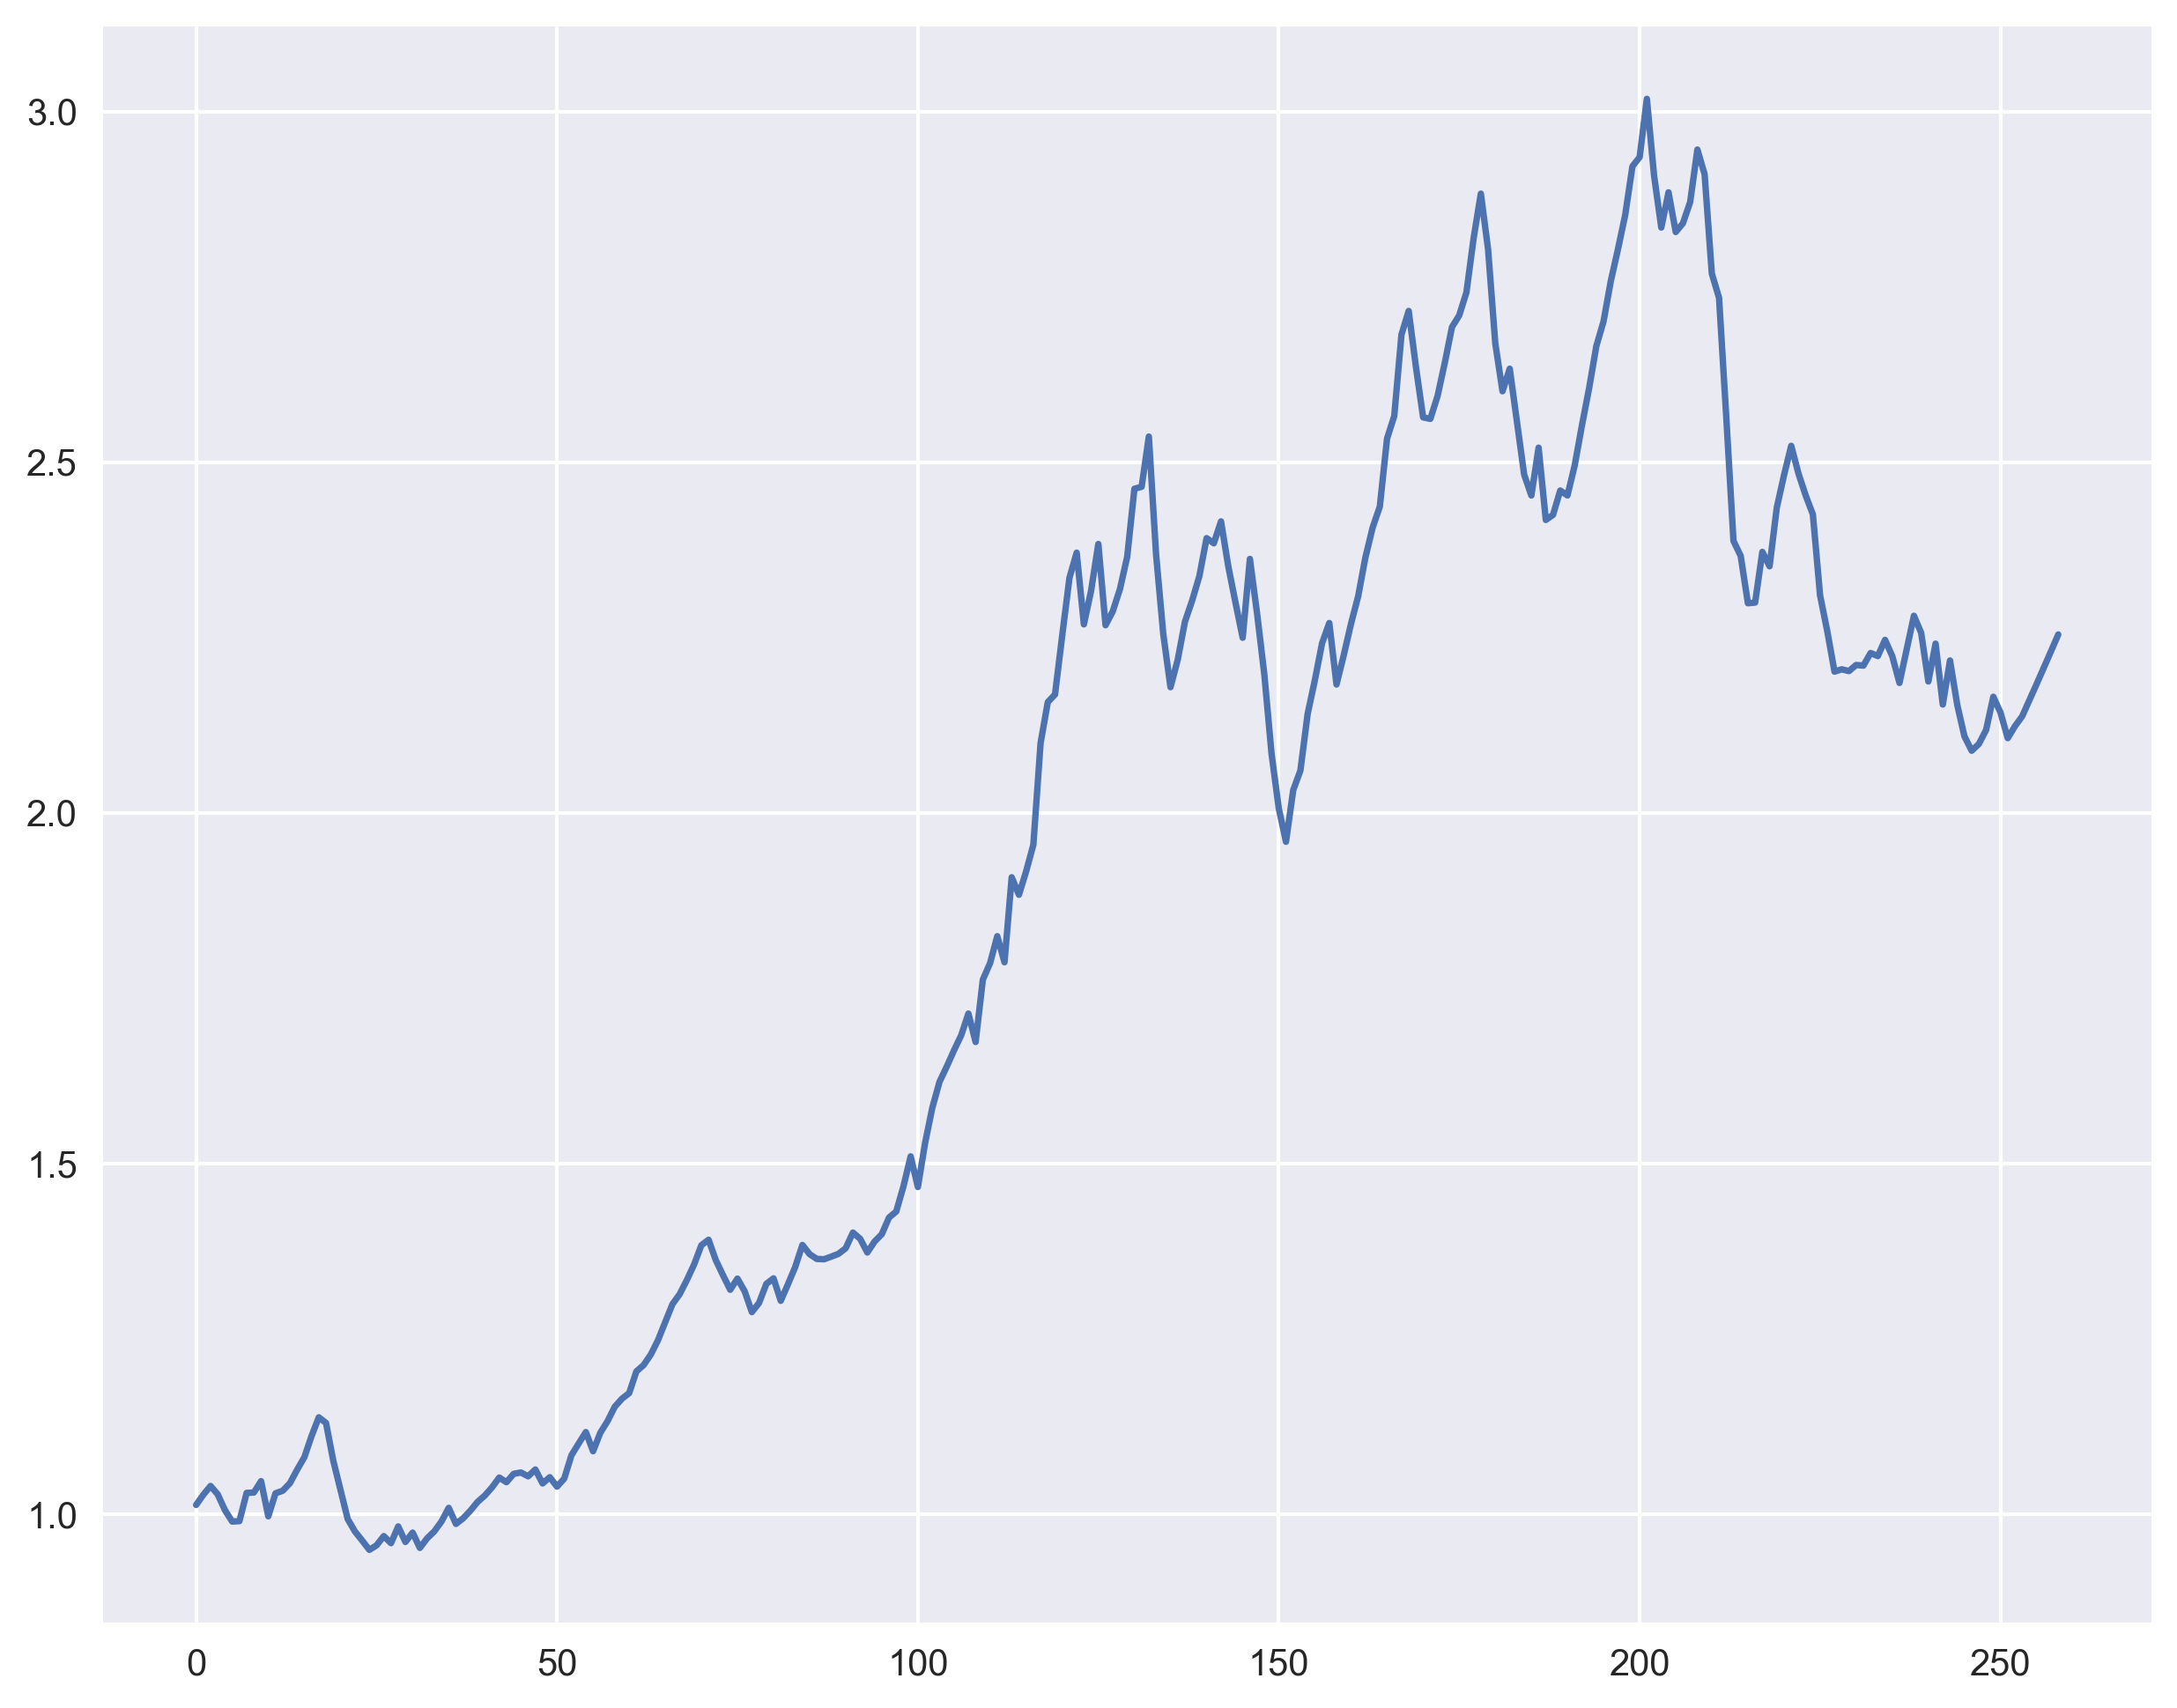

In [93]:
backtest_results = pd.Series(all_returns_).cumsum().apply(np.exp) #backtest result ignoring comission fees
backtest_results.plot()


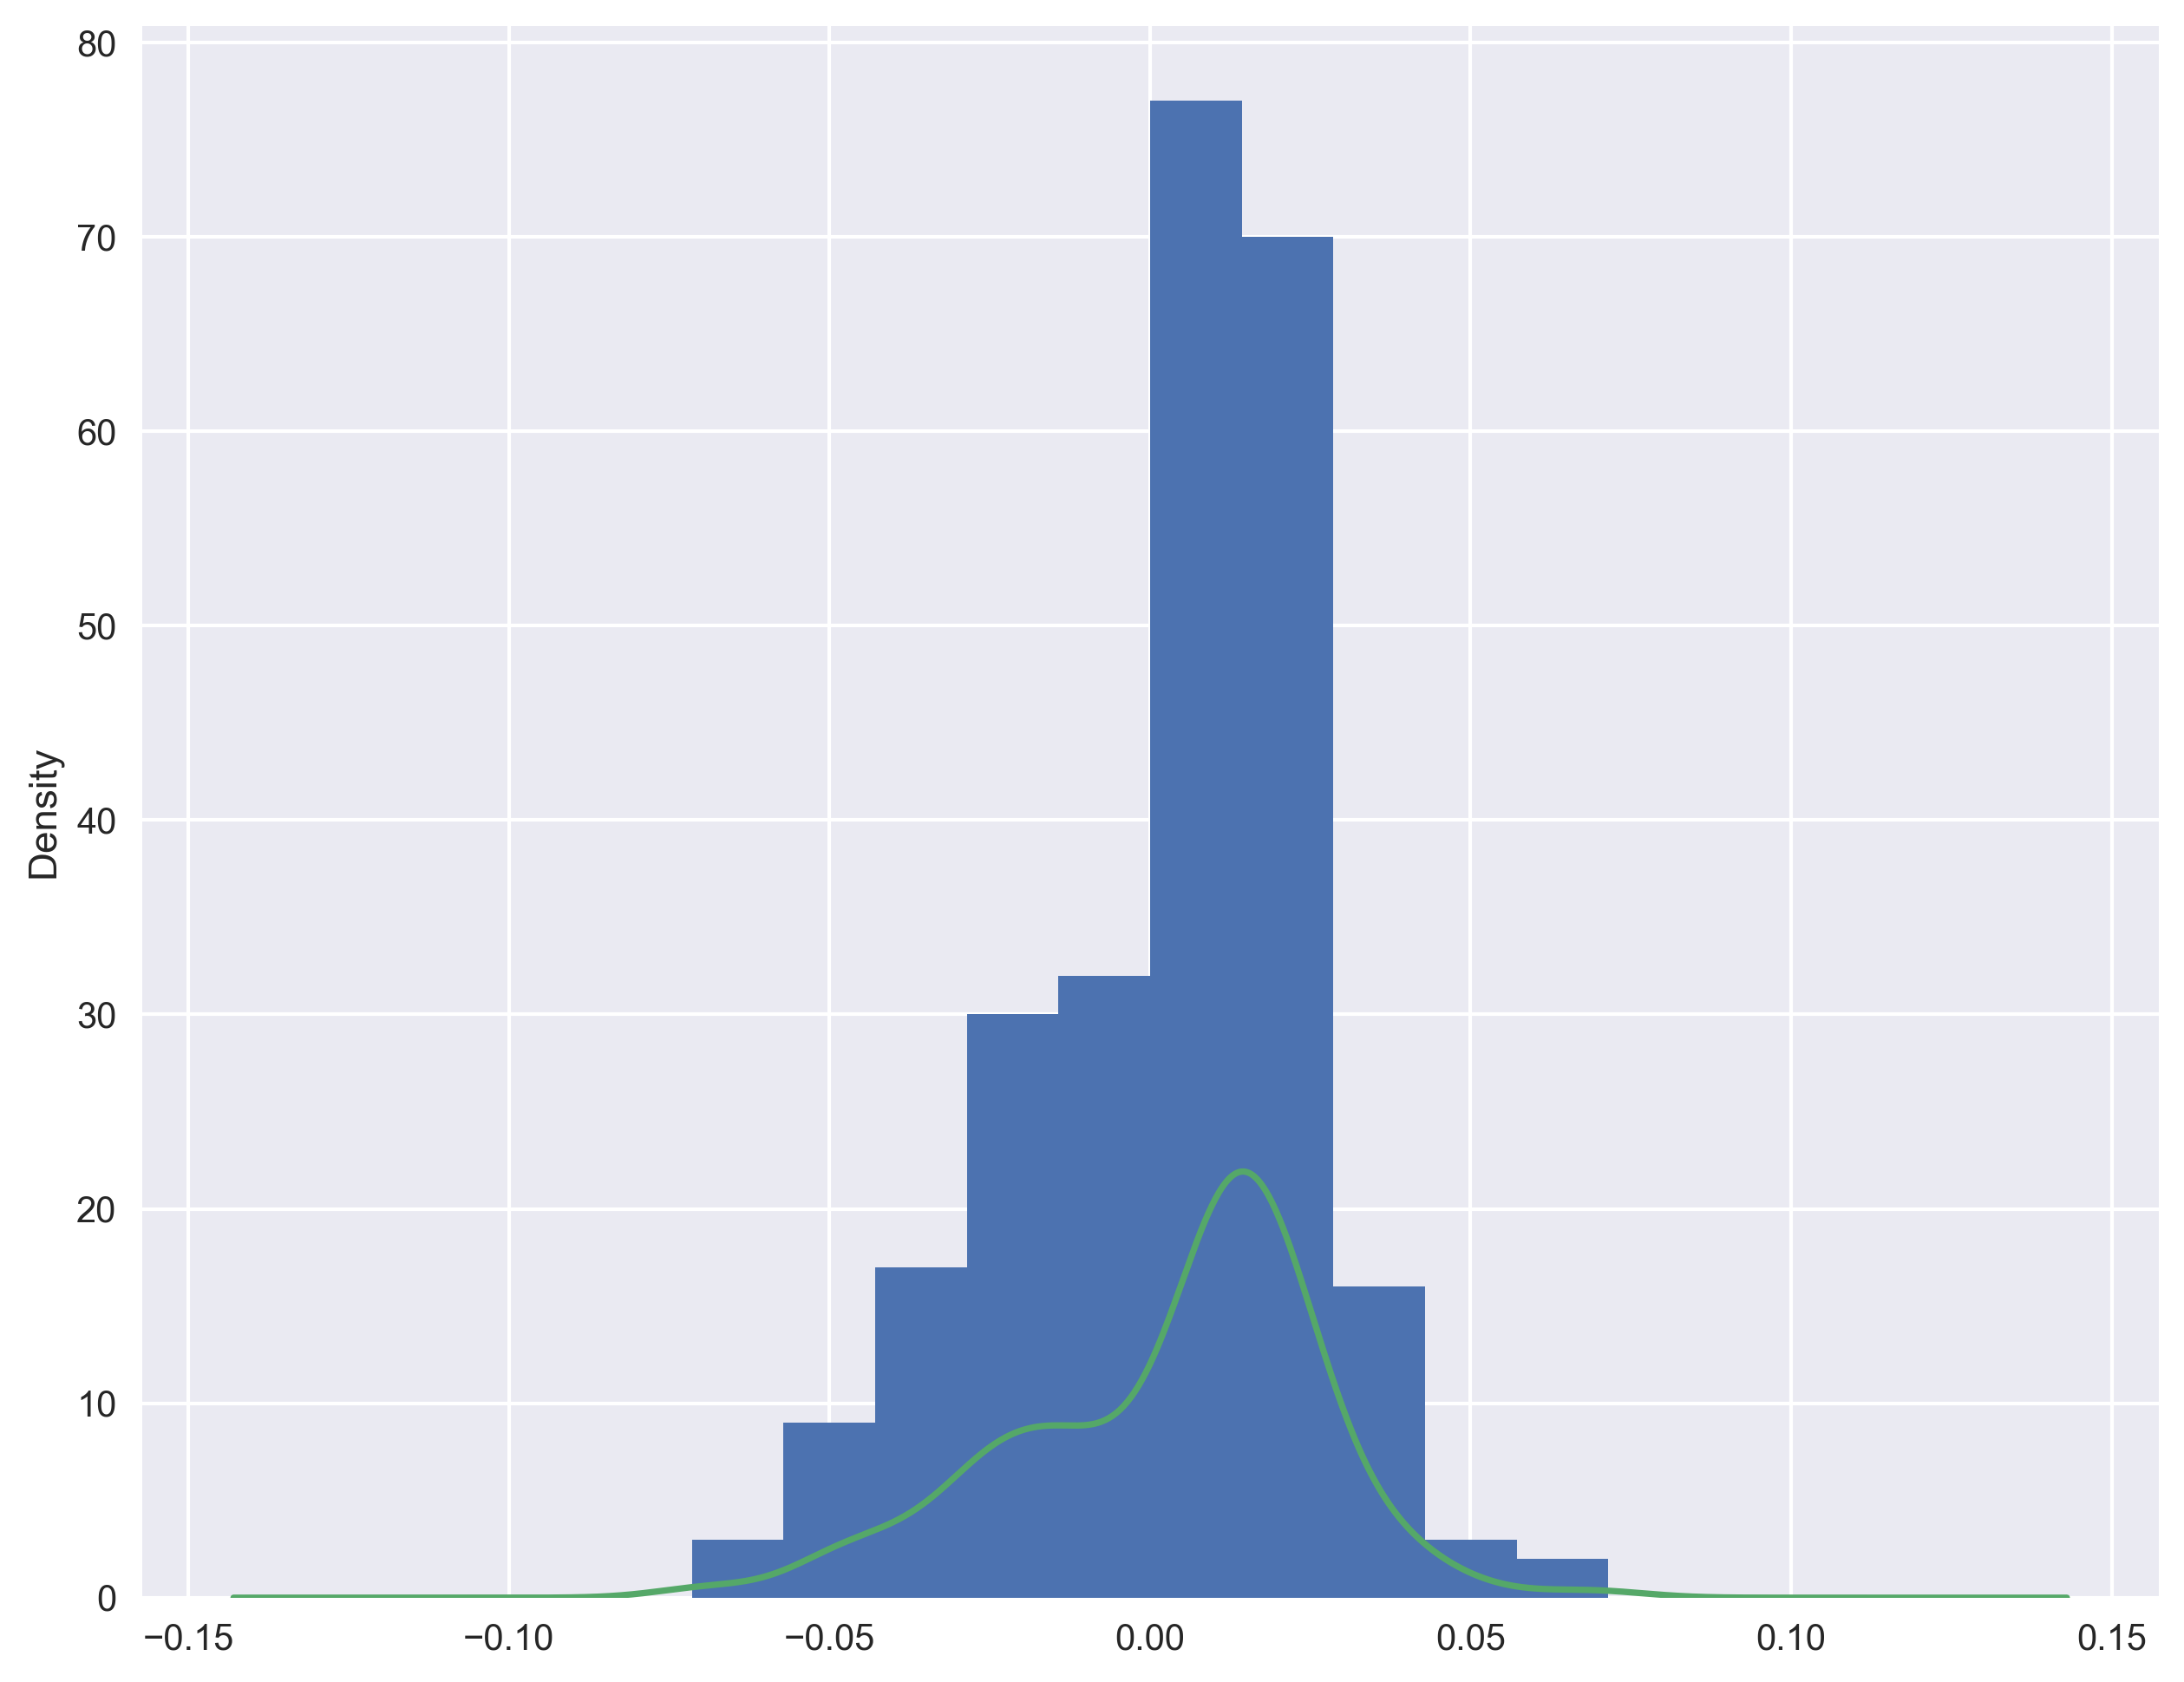

In [97]:
pd.Series(all_returns_).plot(kind="hist")
pd.Series(all_returns_).plot(kind="kde")

In [81]:
def history_buildup():
    mean_return = []
    total_signals  = []
    mean_return_total_signals =[]
    return_per_days = []
    test = []
    rolling_first_criteria = []
    std = []
    std1 = []
    rolling_second_criteria = []
    std_long = []
    take_profit = []
    days_rolling = []
    deviation = []
    max_drawdown = []
    mean_std = []



    g['history'] = []
    history.append(mean_return)
    history.append(total_signals)
    history.append(mean_return_total_signals)
    history.append(return_per_days)
    history.append(test)
    history.append(rolling_first_criteria)
    history.append(std)
    history.append(std1)
    history.append(rolling_second_criteria )
    history.append(std_long)
    history.append(take_profit)
    history.append(days_rolling)
    history.append(deviation)
    history.append(max_drawdown)
    history.append(mean_std)
    
def history_addup():
    history[0].append(all_returns.mean())
    history[1].append(len(days_for_trade))
    history[2].append(all_returns.mean()*len(days_for_trade))
    history[3].append(all_returns.mean()/total_days_in_hand.mean())                                        
    history[4].append(test)
    history[5].append(rolling_first_criteria)
    history[6].append(std)
    history[7].append(std1)
    history[8].append(rolling_second_criteria)
    history[9].append(std_long)
    history[10].append(take_profit)
    history[11].append(days_rolling)
    history[12].append(deviation)
    history[13].append(max_drawdown)
    history[14].append(mean_std)

In [24]:
from math import gcd 
from functools import reduce
    
def lcm(denominators):
    return reduce(lambda a,b: a*b // gcd(a,b), denominators)
    
def myround(x, base=50):
    x = int(x)
    return base * round(x/base)

In [25]:
#mean_return= 0.007078008081155179, total signals= 40, mean_return*total_signals= 0.2831203232462072, return per days= 0.0012099159113085776, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.5, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04787312057273829, mean/std= 0.25603513321615146

In [26]:

'''
#1ocak2019-28mayıs2020
mean_return= 0.01643853325443296, total signals= 40, mean_return*total_signals= 0.6575413301773183, return per days= 0.0023400047337271113, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.5, take_profit= 20, days_rolling= 20, deviation= 2.2, max_drawdown= -0.0943704097191771, mean/std= 0.5672189034463122
mean_return= 0.01775050187528941, total signals= 40, mean_return*total_signals= 0.7100200750115764, return per days= 0.0028629841734337754, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.5, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04273416331350499, mean/std= 0.7891394927852269
mean_return= 0.013637245786403523, total signals= 44, mean_return*total_signals= 0.600038814601755, return per days= 0.001973811890137352, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.25, take_profit= 20, days_rolling= 20, deviation= 2.2, max_drawdown= -0.0943704097191771, mean/std= 0.46636154199084445
mean_return= 0.014829944532636662, total signals= 44, mean_return*total_signals= 0.6525175594360131, return per days= 0.002407813872457613, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.25, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04273416331350499, mean/std= 0.6271321673831957

######################
mean_return= 0.005542082557941073, total signals= 139, mean_return*total_signals= 0.7703494755538092, return per days= 0.0010567208169462402, test= 45, rolling_first_criteria= 20, std= 1.1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.5, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04787312057273829, mean/std= 0.26373929753741016
mean_return= 0.004884081652597299, total signals= 159, mean_return*total_signals= 0.7765689827629706, return per days= 0.0009611002261917953, test= 45, rolling_first_criteria= 20, std= 1.1, std1= 1.8, rolling_second_criteria= 45, std_long= 0, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04787312057273829, mean/std= 0.24113771544235169
mean_return= 0.004896559416613374, total signals= 155, mean_return*total_signals= 0.758966709575073, return per days= 0.0009643795547332566, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.5, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04787312057273829, mean/std= 0.2372174987461571
mean_return= 0.003946940432413121, total signals= 179, mean_return*total_signals= 0.7065023374019487, return per days= 0.0007789441426702853, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04787312057273829, mean/std= 0.19930711771009468

'''

'\n#1ocak2019-28mayıs2020\nmean_return= 0.01643853325443296, total signals= 40, mean_return*total_signals= 0.6575413301773183, return per days= 0.0023400047337271113, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.5, take_profit= 20, days_rolling= 20, deviation= 2.2, max_drawdown= -0.0943704097191771, mean/std= 0.5672189034463122\nmean_return= 0.01775050187528941, total signals= 40, mean_return*total_signals= 0.7100200750115764, return per days= 0.0028629841734337754, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.5, take_profit= 20, days_rolling= 20, deviation= 2, max_drawdown= -0.04273416331350499, mean/std= 0.7891394927852269\nmean_return= 0.013637245786403523, total signals= 44, mean_return*total_signals= 0.600038814601755, return per days= 0.001973811890137352, test= 45, rolling_first_criteria= 20, std= 1, std1= 1.8, rolling_second_criteria= 45, std_long= 0.25, take_profit= 20, da

In [83]:
def loop_function(start, end):
    g['all_returns_']=[]
    g['days_for_trade_']=[]
    g['total_days_in_hand_']=[]
    delete_last=-10
                                        
    for day in range(start, end):
        g['day'] = day

        g['forward_days'] = 60
        backtest_func(portfolios_to_trade, day)
        forward_func(portfolios_to_trade, day, forward_days)
        test_func_regression(portfolios_to_trade)
        ad_fuller(filtered_backtests, test)
        bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
    
        if len(bol_filter) == 0:
        
            test_func_johansen(portfolios_to_trade)
            ad_fuller(filtered_backtests, test)
            bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
        
            if len(bol_filter) == 0:
                continue
        
            else:
                find_index(bol_filter)
                forward_test_johansen(i, take_profit, days_rolling, deviation)
                all_returns_.append(return1)
                days_for_trade_.append(day)
                total_days_in_hand_.append(index+1)
                                    
                if (len(days_for_trade_) <1):
                    print('day{}, johansen{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                    continue
                    
                if (len(days_for_trade_) >= 1):
                
                    if (i == delete_last):
                        days_for_trade_.pop(-1)
                        total_days_in_hand_.pop(-1)
                        all_returns_.pop(-1)    
                    else:
                        print('day{}, johansen{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                        #plot_func()
                        delete_last=i
                        continue
        else:
            find_index(bol_filter)
            forward_test_regression(i, take_profit, days_rolling, deviation)
            all_returns_.append(return1)
            days_for_trade_.append(day)
            total_days_in_hand_.append(index+1)
        
            if (len(days_for_trade_) <1):
                print('day{}, regression{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                continue
        
            if (len(days_for_trade_) >= 1):
                
                if (i == delete_last):
                        days_for_trade_.pop(-1)
                        total_days_in_hand_.pop(-1)
                        all_returns_.pop(-1)                    
                else:
                    print('day{}, regression{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                    #plot_func()
                    delete_last=i
                    continue                     
                                    
    g['days_for_trade'] = pd.Series(days_for_trade_)
    g['total_days_in_hand'] = pd.Series(total_days_in_hand_)
    g['all_returns'] = pd.Series(all_returns_)
    
    
                                        
    g['max_drawdown'] = all_returns.min()  
    g['mean_std'] = all_returns.mean()/all_returns.std()
    print('mean_return= {}, total signals= {}, mean_return*total_signals= {}, return per days= {}, test= {}, rolling_first_criteria= {}, std= {}, std1= {}, rolling_second_criteria= {}, std_long= {}, take_profit= {}, days_rolling= {}, deviation= {}, max_drawdown= {}, mean/std= {}\n'.format(all_returns.mean(), len(days_for_trade), all_returns.mean()*len(days_for_trade), all_returns.mean()/total_days_in_hand.mean(), test, rolling_first_criteria, std, std1, rolling_second_criteria, std_long, take_profit, days_rolling, deviation, max_drawdown, mean_std))
    
    history_addup()   

In [84]:
def easy_loop_function(start, end):
    g['all_returns_']=[]
    g['days_for_trade_']=[]
    g['total_days_in_hand_']=[]
    delete_last=-10
                                        
    for day in range(start, end):
        g['day'] = day
        g['forward_days'] = 60
        backtest_func(portfolios_to_trade, day)
        forward_func(portfolios_to_trade, day, forward_days)
        test_func_regression(portfolios_to_trade)
        ad_fuller(filtered_backtests, test)
        bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
    
        if len(bol_filter) == 0:
        
            test_func_johansen(portfolios_to_trade)
            ad_fuller(filtered_backtests, test)
            bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
        
            if len(bol_filter) == 0:
                continue
        
            else:          
                find_index(bol_filter)
                if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                    forward_test_johansen(i, take_profit, days_rolling, deviation)
                    all_returns_.append(return1)
                    days_for_trade_.append(day)
                    total_days_in_hand_.append(index+1)
                                    
                    if (len(days_for_trade_) <1):
                        print('day{}, johansen{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                        continue
                    
                    if (len(days_for_trade_) >= 1):
                
                        if (i == delete_last):
                            days_for_trade_.pop(-1)
                            total_days_in_hand_.pop(-1)
                            all_returns_.pop(-1)    
                        else:
                            print('day{}, johansen{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                            #plot_func()
                            delete_last=i
                g['bol_filter'] = []
                del g['beta'] 
                        
        else:
            find_index(bol_filter)
            if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                forward_test_regression(i, take_profit, days_rolling, deviation)
                all_returns_.append(return1)
                days_for_trade_.append(day)
                total_days_in_hand_.append(index+1)
        
                if (len(days_for_trade_) <1):
                    print('day{}, regression{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                    continue
        
                if (len(days_for_trade_) >= 1):
                
                    if (i == delete_last):
                        days_for_trade_.pop(-1)
                        total_days_in_hand_.pop(-1)
                        all_returns_.pop(-1)                    
                    else:
                        print('day{}, regression{} generates {} return until __{}th day__'.format(days_for_trade_[-1], i, all_returns_[-1], total_days_in_hand_[-1]))
                        #plot_func()
                        delete_last=i
            g['bol_filter'] = []
            del g['beta']                   
                                    
    g['days_for_trade'] = pd.Series(days_for_trade_)
    g['total_days_in_hand'] = pd.Series(total_days_in_hand_)
    g['all_returns'] = pd.Series(all_returns_)
    
    
                                        
    g['max_drawdown'] = all_returns.min()  
    g['mean_std'] = all_returns.mean()/all_returns.std()
    print('mean_return= {}, total signals= {}, mean_return*total_signals= {}, return per days= {}, test= {}, rolling_first_criteria= {}, std= {}, std1= {}, rolling_second_criteria= {}, std_long= {}, take_profit= {}, days_rolling= {}, deviation= {}, max_drawdown= {}, mean/std= {}\n'.format(all_returns.mean(), len(days_for_trade), all_returns.mean()*len(days_for_trade), all_returns.mean()/total_days_in_hand.mean(), test, rolling_first_criteria, std, std1, rolling_second_criteria, std_long, take_profit, days_rolling, deviation, max_drawdown, mean_std))
    
    history_addup()   

In [86]:
def subs_function(start, end):
        
    all_returns_=[]
    days_for_trade_=[]
    total_days_in_hand_=[]
    delete_last=-10
    for day in range(start, end):
        g['day'] = day
        
        if (day == end-1):
            backtest_func(portfolios_to_trade, day)
            forward_func(portfolios_to_trade, day, forward_days)
            test_func_regression(portfolios_to_trade)
            ad_fuller(filtered_backtests, test)
            bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
            
            if len(bol_filter) == 0:

                test_func_johansen(portfolios_to_trade)
                ad_fuller(filtered_backtests, test)
                bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
                
                if len(bol_filter) == 0:
                    continue
                    
                else:
                    find_index(bol_filter)
                    if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                        if (i==delete_last):
                            break
                        else:
                            print('\n\nOpen New Position..')
                            print('Position opened on day: ', day)
                            print('Position opened on time: ', bank.index[day][1].date())
                            print('------------------------------------------------')
                            longs = ''
                            for stock in range(len(portfolios_to_trade[int(i)][0])):
                                if stock>0:
                                    longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                    longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+1])
                                else: 
                                    longs += portfolios_to_trade[int(i)][0][stock].upper()
                                    longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+1])
                            print('   Long stocks: ', longs)
                        
                            shorts = ''
                            for stock in range(len(portfolios_to_trade[int(i)][1])):
                                if stock>0:
                                    shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                    shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+1])
                                else: 
                                    shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                    shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+1])
                            print('   Short stocks: ', shorts)
                            print('beta: ', round(beta,3))
                            open_email(longs, shorts)
                            break
            
            else:
                find_index(bol_filter)
                if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                    if (i==delete_last):
                        break
                    else:
                        print('\n\nOpen New Position..')
                        print('Position opened on day: ', day)
                        print('Position opened on time: ', bank.index[day][1].date())
                        print('------------------------------------------------')
                        longs = ''
                        for stock in range(len(portfolios_to_trade[int(i)][0])):
                            if stock>0:
                                longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+1])
                            else: 
                                longs += portfolios_to_trade[int(i)][0][stock].upper()
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+1])
                        print('   Long stocks: ', longs)
                        
                        shorts = ''
                        for stock in range(len(portfolios_to_trade[int(i)][1])):
                            if stock>0:
                                shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+1])
                            else: 
                                shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+1])
                        print('   Short stocks: ', shorts)
                        print('beta: ', round(beta,3))
                        open_email(longs, shorts)
                        break

        g['forward_days'] = 60
        backtest_func(portfolios_to_trade, day)
        forward_func(portfolios_to_trade, day, forward_days)
        test_func_regression(portfolios_to_trade)
        ad_fuller(filtered_backtests, test)
        bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
    
        if len(bol_filter) == 0:
        
            test_func_johansen(portfolios_to_trade)
            ad_fuller(filtered_backtests, test)
            bollinger(ad_filter, rolling_first_criteria, std, std1, rolling_second_criteria, std_long)
        
            if len(bol_filter) == 0:
                continue
        
            else:
                find_index(bol_filter)
                if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                    forward_test_johansen(i, take_profit, days_rolling, deviation)
                    all_returns_.append(return1)
                    days_for_trade_.append(day)
                    total_days_in_hand_.append(index+1)
                
                    if (len(days_for_trade_) ==1):
                        print('\nClose position of recent trade..\n')
                        print('Position opened on day: ', day)
                        print('Position opened on time:, ', bank.index[day][1].date())
                        print('Position closed on day: ', day+index+1)
                        print('Position closed on time: ', bank.index[day+index+1][1].date())
                        stocks_=''
                        print('------------------------------------------------')
                        
                        longs = ''
                        for stock in range(len(portfolios_to_trade[int(i)][0])):
                            if stock>0:
                                longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                            else: 
                                longs += portfolios_to_trade[int(i)][0][stock].upper()
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                        print('   Long stocks: ', longs)
                        
                        shorts = ''
                        for stock in range(len(portfolios_to_trade[int(i)][1])):
                            if stock>0:
                                shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                            else: 
                                shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                        print('   Short stocks: ', shorts)
                        print('beta: ', round(beta,3))
                        print('total days position stayed open: ', index+1)
                        if return1 > 0:
                            print('      profit for the position :', round(return1,3))
                        if return1 < 0:
                            print('      loss for the position :', round(return1,3))
                        delete_last=i
                    
                        if ((day+index)==(end-1)):
                            close_email(longs, shorts)                         
                        continue
                    
                    if (len(days_for_trade_) > 1):
                
                        if (i == delete_last):
                            days_for_trade_.pop(-1)
                            total_days_in_hand_.pop(-1)
                            all_returns_.pop(-1)  
                            continue
                        
                        elif g['turn_on'] == 1:
                            print('\nClose position of recent trade..\n')
                            print('Position opened on day: ', day)
                            print('Position opened on time: ', bank.index[day][1].date())
                            print('Position closed on day: ', day+index+1)
                            print('Position closed on time: ', bank.index[day+index+1][1].date())
                            print('------------------------------------------------')
                            longs = ''
                            for stock in range(len(portfolios_to_trade[int(i)][0])):
                                if stock>0:
                                    longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                    longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                                else: 
                                    longs += portfolios_to_trade[int(i)][0][stock].upper()
                                    longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                            print('   Long stocks: ', longs)
                        
                            shorts = ''
                            for stock in range(len(portfolios_to_trade[int(i)][1])):
                                if stock>0:
                                    shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                    shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                                else: 
                                    shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                    shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                            print('   Short stocks: ', shorts)
                            print('beta: ', round(beta,3))
                            print('total days position stayed open: ', index+1)
                            if return1 > 0:
                                print('      profit for the position:', round(return1,3))
                            if return1 < 0:
                                print('      loss for the position:', round(return1,3))
                            delete_last=i
                            
                            if ((day+index)==(end-1)):
                                close_email(longs, shorts) 
                            #plot_func()
            g['bol_filter'] = []
            del g['beta'] 

        else:
            find_index(bol_filter)
            if (len(portfolios_to_trade[int(i)][0]) <= 2) & (len(portfolios_to_trade[int(i)][1]) <= 2):
                forward_test_regression(i, take_profit, days_rolling, deviation)
                all_returns_.append(return1)
                days_for_trade_.append(day)
                total_days_in_hand_.append(index+1)
        
                if (len(days_for_trade_) ==1):  
                
                    print('\nClose position of recent trade..\n')
                    print('Position opened on day: ', day)
                    print('Position opened on time: ', bank.index[day][1].date())
                    print('Position closed on day: ', day+index+1)
                    print('Position closed on time: ', bank.index[day+index+1][1].date())
                    print('------------------------------------------------')
                    longs = ''
                    for stock in range(len(portfolios_to_trade[int(i)][0])):
                        if stock>0:
                            longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                            longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                        else: 
                            longs += portfolios_to_trade[int(i)][0][stock].upper()
                            longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                    print('   Long stocks: ', longs)
                        
                    shorts = ''
                    for stock in range(len(portfolios_to_trade[int(i)][1])):
                        if stock>0:
                            shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                            shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                        else: 
                            shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                            shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                    print('   Short stocks: ', shorts)
                    print('beta: ', round(beta,3))
                    print('total days position stayed open: ', index+1)
                    if return1 > 0:
                        print('      profit for the position:', round(return1,3))
                    if return1 < 0:
                        print('      loss for the position:', round(return1,3))
                    delete_last=i
                    
                    if ((day+index)==(end-1)):
                        close_email(longs, shorts)                            
                        continue
        
                if (len(days_for_trade_) > 1):
                    if (i == delete_last):
                        days_for_trade_.pop(-1)
                        total_days_in_hand_.pop(-1)
                        all_returns_.pop(-1)   
                        continue
                        
                    elif g['turn_on'] == 1:
                        print('\nClose position of recent trade..\n')
                        print('Position opened on day: ', day)
                        print('Position opened on time: ', bank.index[day][1].date())
                        print('Position closed on day: ', day+index+1)
                        print('Position closed on time: ', bank.index[day+index+1][1].date())
                        print('------------------------------------------------')
                        longs = ''
                        for stock in range(len(portfolios_to_trade[int(i)][0])):
                            if stock>0:
                                longs += ', {}'.format(portfolios_to_trade[int(i)][0][stock].upper())
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                            else: 
                                longs += portfolios_to_trade[int(i)][0][stock].upper()
                                longs += '({})'.format(bank_prices[portfolios_to_trade[int(i)][0][stock]][day+index+2])
                        print('   Long stocks: ', longs)
                        
                        shorts = ''
                        for stock in range(len(portfolios_to_trade[int(i)][1])):
                            if stock>0:
                                shorts += ', {}'.format(portfolios_to_trade[int(i)][1][stock].upper())
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                            else: 
                                shorts += portfolios_to_trade[int(i)][1][stock].upper()     
                                shorts += '({})'.format(bank_prices[portfolios_to_trade[int(i)][1][stock]][day+index+2])
                        print('   Short stocks: ', shorts)
                        print('beta: ', round(beta,3))
                        print('total days position stayed open: ', index+1)
                        if return1 > 0:
                            print('      profit for the position: ', round(return1,3))
                        if return1 < 0:
                            print('      loss for the position: ', round(return1,3))
                        delete_last=i  
                        if ((day+index)==(end-1)):
                            close_email(longs, shorts)
                        #plot_func()
            g['bol_filter'] = []
            del g['beta'] 